In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np



In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv')

In [3]:
#The analysis of this data is to see whether there is a trend in the NYC schoool data that will reveal what Regents subjects garnered the highest mean score for Brooklyn high school students in the years represented in this dataset.
#Exploratory Data Analysis = EDA
df.describe()

,Year,Total Tested
count,212331.000000,212331.000000
mean,2015.956069,49.364200
std,0.799726,93.023576
min,2015.000000,1.000000
25%,2015.000000,5.000000
50%,2016.000000,20.000000
75%,2017.000000,57.000000
max,2017.000000,1729.000000


In [5]:
#EDA
df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3,33.3,6,66.7,0,0,na,na
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2,13.3,13,86.7,5,33.3,na,na
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5,55.6,4,44.4,1,11.1,na,na
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1,2,48,98,23,46.9,48,98
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79,9,17.6,42,82.4,33,64.7,40,78.4


In [6]:
#EDA
df.tail()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
212326,84X717,Icahn Charter School,K-8,Living Environment,2016,8,s,s,s,s,s,s,s,na,na
212327,84X717,Icahn Charter School,K-8,Living Environment,2016,5,s,s,s,s,s,s,s,na,na
212328,84X717,Icahn Charter School,K-8,Living Environment,2017,6,s,s,s,s,s,s,s,na,na
212329,84X717,Icahn Charter School,K-8,Living Environment,2017,4,s,s,s,s,s,s,s,na,na
212330,84X717,Icahn Charter School,K-8,U.S. History and Government,2015,1,s,s,s,s,s,s,s,na,na


In [4]:
#cleaning data to remove rows missing the mean regents score. 
#We will remove all unnecessary columns not needed for analysis with drop() function, will first create a list with all columns intended for dropping
drop_cols = ['Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above', 'Number Scoring CR', 'Percent Scoring CR']
df.drop(drop_cols, inplace = True, axis=1)


In [5]:
#We use the head() to confirm that the columns that were added to the drop_cols list were indeed dropped.
df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79


In [4]:
#cleaning and removing data that includes non-standard missing values, this dataset includes 's' values that represents rows with =<5 students in the set.
# will make a list of missing data values and then write code to remove rows with those values
missing_values = ['--', 's', 'n/a', 'na']
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values = missing_values)

In [7]:
df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2015,9,67.4,3.0,33.3,6.0,66.7,0.0,0.0,NaN,NaN
6,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2016,15,72.6,2.0,13.3,13.0,86.7,5.0,33.3,NaN,NaN
7,01M140,P.S. 140 Nathan Straus,K-8,Living Environment,2017,9,64.4,5.0,55.6,4.0,44.4,1.0,11.1,NaN,NaN
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4,1.0,2.0,48.0,98.0,23.0,46.9,48.0,98.0
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0,9.0,17.6,42.0,82.4,33.0,64.7,40.0,78.4


In [5]:
#after running code to remove rows with "s" values, data has reset to include all previous columns that were once dropped. I ran drop() function again to remove unnecessary columns
drop_cols = ['Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above', 'Number Scoring CR', 'Percent Scoring CR']
df.drop(drop_cols, inplace = True, axis=1)

In [16]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN


In [6]:
#previous code actually helped python to recognize that "s" values are NaN values, "na_values = missing_value". So, now using dropna() function.
df.dropna(inplace = True)

In [12]:
df.head(10)

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
8,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2015,49,78.4
9,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2016,51,79.0
10,01M184,P.S. 184m Shuang Wen,K-8,Common Core Algebra,2017,51,84.8
12,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2015,23,62.9
13,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2016,22,69.0
14,01M188,P.S. 188 The Island School,K-8,Common Core Algebra,2017,20,67.4
20,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2015,12,52.3
21,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2016,50,63.9
22,01M292,Orchard Collegiate Academy,High school,Common Core Algebra,2017,53,67.5
23,01M292,Orchard Collegiate Academy,High school,Common Core Algebra2,2016,6,48.0


In [12]:
#Now to filter the data down to Regents mean score data for Brooklyn students. 
#Since the only way to determine whether a school is located in Brooklyn is to identify a "K" in the DBN, I will filter for partial string from column "School DBN". 
df[df['School DBN'].str.contains("K")]

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score
8400,13K008,P.S. 008 Robert Fulton,K-8,Common Core Algebra,2015,11,69.7
8401,13K008,P.S. 008 Robert Fulton,K-8,Common Core Algebra,2016,26,80.0
8402,13K008,P.S. 008 Robert Fulton,K-8,Common Core Algebra,2017,70,75.0
8405,13K008,P.S. 008 Robert Fulton,K-8,Living Environment,2017,59,76.8
8406,13K113,M.S. 113 Ronald Edmonds Learning Center,Junior High-Intermediate-Middle,Common Core Algebra,2015,82,66.1
...,...,...,...,...,...,...,...
208999,84K803,Brooklyn LAB Charter School,Junior High-Intermediate-Middle,Common Core Algebra,2017,11,73.5
209003,84K803,Brooklyn LAB Charter School,Junior High-Intermediate-Middle,Living Environment,2017,69,73.7
209004,84K803,Brooklyn LAB Charter School,Junior High-Intermediate-Middle,Living Environment,2017,18,74.6
209008,84K803,Brooklyn LAB Charter School,Junior High-Intermediate-Middle,U.S. History and Government,2017,30,48.7


In [20]:
#create a new dataframe for filtered data
df2=df[df['School DBN'].str.contains("K")]

In [28]:
#data types
df2.dtypes

School DBN       object
School Name      object
School Level     object
Regents Exam     object
Year              int64
Total Tested      int64
Mean Score      float64
dtype: object

<Axes: xlabel='Regents Exam'>

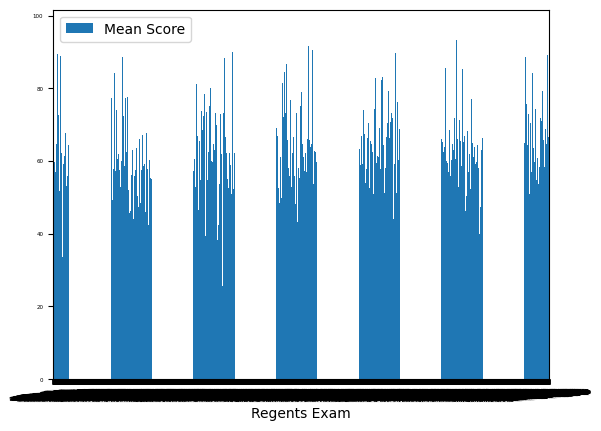

In [35]:
#this bar chart does is not a great visual representation of the dataset. It is very difficult to see any trends due to the number of Regents Exam in the x-axis.
df2.plot(x="Regents Exam", y="Mean Score", kind="bar", rot=5, fontsize=4)

In [37]:
#Due to the number of rows representing different groups of Brooklyn students tested for each Regents, it maybe easier to group each regents and the corresponding mean scores for each group.
regents_totals = df2.groupby("Regents Exam")["Mean Score"].sum().sort_values()

In [39]:
regents_totals

Regents Exam
Physical Settings/Physics           43102.7
Common Core Algebra2                66181.5
Geometry                            66823.5
Algebra2/Trigonometry               74821.1
Physical Settings/Chemistry         95620.3
Integrated Algebra                 121013.3
English                            121404.6
Common Core Geometry               145466.3
Physical Settings/Earth Science    172520.0
Global History and Geography       268690.7
Common Core English                271620.1
U.S. History and Government        295254.6
Living Environment                 378892.0
Common Core Algebra                386774.6
Name: Mean Score, dtype: float64

<Axes: ylabel='Regents Exam'>

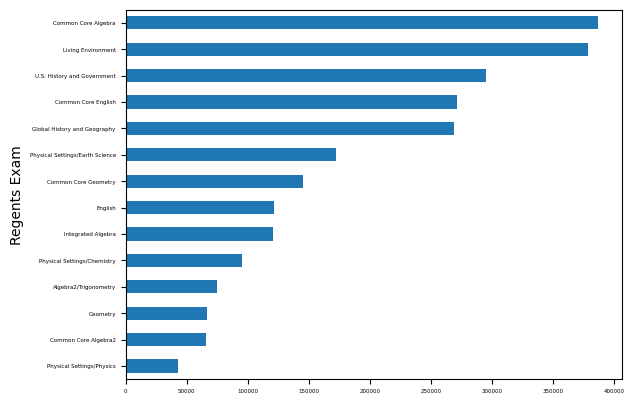

In [40]:
#Although, this plot has aggregated all the mean scores, it does provide visibility into how many students took each regents. Data can be intepreted multiple ways.
#Bar chart shows Common Core Algebra has the highest mean score.
#However, since the mean scores for all Brooklyn students has been aggregated, it is difficult to determine whether the higher number is due to the students getting higher test scores or due to more students taking the exam than other Regents exams.
regents_totals.plot(kind="barh", fontsize=4)